

# Project: Investigate a Dataset - [FBI GUN DATA]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

[Source](https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md)

- The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type. 

- The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year

#### COLUMNS DESCRIPTION - NICS-DATA
Each column represents the type of transaction submitted to the National Instant Criminal Background Check System (NICS). In addition, each type of transaction is broken down by the type of firearm—handgun, long gun, and other. The types of firearms are defined by the Bureau of Alcohol, Tobacco, Firearms and Explosives as follows:

- Handgun—(a) any firearm which has a short stock and is designed to be held and fired by the use of a single hand; and (b) any combination of parts from which a firearm described in paragraph (a) can be assembled.
- Long Gun—a weapon designed or redesigned, made or remade, and intended to be fired from the shoulder, and designed or redesigned and made or remade to use the energy of the explosive in (a) a fixed metallic cartridge to fire a single projectile through a rifled bore for each single pull of the trigger; or (b) a fixed shotgun shell to fire through a smooth bore 
either a number of ball shot or a single projectile for each single pull of the trigger.
- Other—refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers.
- Multiple denotes a background check where more than one type of firearm is associated to a 
single background check
- Admin denotes the administrative checks that are for other authorized uses of the NICS.
- Pre-Pawn—background checks requested by an officially-licensed FFL on prospective firearm transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, prior to actually pledging or pawning the firearm.
- Redemption—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop.
- Returned/Disposition—background checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited.
- Rentals—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business.
- Private Sale—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.
- Return to Seller-Private Sale—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.

#### COLUMNS DESCRIPTION - CENSUS DATA

This section will be skipped as the column names are explicit and self explanatory.

#### RELATIONSHIP BETWEEN SOURCES

The use of the census data alongside the NCIS data allows one to get a rough estimate of how many guns per capita there are for each state, additionally this also allows us to analyse the possible effects of various census data in predicting the number of guns per capita and ascertain their significance.


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

- What census data is most associated with high gun per capita?

- What is the overall trend of gun purchases?


> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
raw_nics_data = pd.read_csv('gun_data.csv')


In [4]:
raw_nics_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [5]:
raw_census_data = pd.read_csv('U.S. Census Data.csv')


### Data Cleaning
 

In [6]:

raw_nics_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


The NICS data contains a few columns but we are interested in just the totals for this analysis, therefore the others will be dropped.
To convert background checks into estimated sales, we relied on a method suggested in the Small Arms Survey by Jurgen Brauer, a professor at Georgia Regents University. Each long gun and handgun check was counted as 1.1 sales. Each multiple-gun check was counted as two sales. Permit checks and other types of checks were omitted. The multiplier is an estimate based on Mr. Brauer's interviews with gun shop owners.

[Source](http://www.smallarmssurvey.org/fileadmin/docs/F-Working-papers/SAS-WP14-US-Firearms-Industry.pdf)

First select only the columns we'll be using to estimate gun sales

In [7]:
nics_data_dropped = raw_nics_data[['month', 'state', 'handgun','long_gun','multiple']]
nics_data_dropped.head()

,month,state,handgun,long_gun,multiple
0,2017-09,Alabama,5734.0,6320.0,317
1,2017-09,Alaska,2320.0,2930.0,160
2,2017-09,Arizona,11063.0,7946.0,631
3,2017-09,Arkansas,4347.0,6063.0,366
4,2017-09,California,37165.0,24581.0,0


Use the 'handgun', 'long_gun' and 'multiple' columns to estimate gun sales then drop those columns

In [8]:
nics_data_estimate = nics_data_dropped.copy()
nics_data_estimate['estimated gun sales'] = (nics_data_dropped['handgun'] * 1.1) + (nics_data_dropped['long_gun'] * 1.1) + (nics_data_dropped['multiple'] * 2)
nics_data_estimate.drop(['handgun','long_gun','multiple'], axis=1,inplace=True)
nics_data_estimate.head()

,month,state,estimated gun sales
0,2017-09,Alabama,13893.4
1,2017-09,Alaska,6095.0
2,2017-09,Arizona,22171.9
3,2017-09,Arkansas,12183.0
4,2017-09,California,67920.6


Convert the 'month' column to datetime then split it into 'month_year', 'month' and 'year'.
With each column containing the named date information.

In [9]:
nics_data_year = nics_data_estimate.copy()
nics_data_year['month_year'] = pd.to_datetime(nics_data_estimate['month'], format='%Y/%m').dt.to_period('M')
nics_data_year['year'] = nics_data_year['month_year'].dt.year
nics_data_year['month'] = pd.to_datetime(nics_data_estimate['month'], format='%Y/%m').dt.month_name()
nics_data_year.head()

,month,state,estimated gun sales,month_year,year
0,September,Alabama,13893.4,2017-09,2017
1,September,Alaska,6095.0,2017-09,2017
2,September,Arizona,22171.9,2017-09,2017
3,September,Arkansas,12183.0,2017-09,2017
4,September,California,67920.6,2017-09,2017


Now we have just the columns we need in the nics data. However looking at the census data, we only have census data as at 2016, so we will filter out nics data not relevant to that year.
This can be done by filtering `year == 2016`.

In [10]:
# nics_data_dropped.loc[:,'month'] = pd.to_datetime(nics_data_dropped['month'], format="%Y/%m")
#
nics_data_filtered = nics_data_year.query("year == 2016").reset_index(drop=True)

nics_data_filtered.head()

,month,state,estimated gun sales,month_year,year
0,December,Alabama,35443.2,2016-12,2016
1,December,Alaska,8945.5,2016-12,2016
2,December,Arizona,36395.9,2016-12,2016
3,December,Arkansas,25657.5,2016-12,2016
4,December,California,172560.3,2016-12,2016


Now we just need to sum up the totals for each state for all months of 2016 to get an estimate of the number of guns.
For simplicity sake we'll assume a 1:1 correlation to number of guns.

In [11]:
nics_state_totals = nics_data_filtered.groupby('state')['estimated gun sales'].sum()
nics_state_totals

state
Alabama                  315684.6
Alaska                    86447.8
Arizona                  319165.2
Arkansas                 187400.4
California              1226395.5
Colorado                 493366.8
Connecticut              182806.8
Delaware                  54120.0
District of Columbia        811.3
Florida                 1126678.0
Georgia                  370340.7
Guam                       2233.9
Hawaii                        0.0
Idaho                    117137.4
Illinois                 606898.6
Indiana                  519104.0
Iowa                      41988.4
Kansas                   178892.4
Kentucky                 288612.1
Louisiana                358999.0
Maine                    110103.5
Mariana Islands              17.6
Maryland                 137290.7
Massachusetts            134658.8
Michigan                 328993.7
Minnesota                315347.5
Mississippi              243585.2
Missouri                 550714.2
Montana                  109175.1
Nebraska

Alright, we can now move on to the census data for now.

In [12]:
raw_census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


First the 'Fact Note' column will be dropped

In [13]:
census_data = raw_census_data.drop(['Fact Note'], axis=1)
census_data.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Then we will drop rows only bear information on the 2010 census since our focus is on 2016 as well as any rows we don't deem relevant to our analysis.

We will also drop columns except those that bear gender, age and race information

In [14]:
census_data_dropped = census_data[:63].drop([1,3,5,7,9,11], axis=0).reset_index(drop=True)
census_data_dropped.tail()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
52,"Minority-owned firms, 2012","92,219","13,688","135,313","35,982","1,619,857","85,849","56,113","14,440","926,112",...,4101,105234,"1,070,392","24,423","2,354","185,043","92,807","5,777","40,507","4,077"
53,"Nonminority-owned firms, 2012","272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782","1,121,749",...,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
54,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
55,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
56,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8


Now we will transpose the census data to make it easier to analyse

In [15]:
census_data_transposed = census_data_dropped.rename(columns={'Fact': 'state'}).set_index('state').transpose()

census_data_transposed.head()

state,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)",...,"Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010"
Alabama,"4,863,300",1.70%,6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,...,1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4
Alaska,"741,894",4.50%,7.30%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,...,0.40%,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2
Arizona,"6,931,071",8.40%,6.30%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,...,2.40%,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3
Arkansas,"2,988,248",2.50%,6.40%,23.60%,16.30%,50.90%,79.40%,15.70%,1.00%,1.60%,...,1.10%,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56
California,"39,250,017",5.40%,6.30%,23.20%,13.60%,50.30%,72.70%,6.50%,1.70%,14.80%,...,3.50%,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1


Looking through the data, We observe that there is a mixture of percentages and floats, as well as some placeholder values.
We'll remedy that

In [16]:
def replacePlaceholder(x):
    if x == 'Z' or x == 'FN' or x == 'F' or x == 'NA' or x == 'S' or x == 'D':
        return 0
    return x

In [17]:
def convertToFloat(x):
    new_x = replacePlaceholder(x)
    try:
        if (type(new_x) == str):
            new_x = new_x.replace(',', '')
            if ("%" in new_x):
                return float(new_x.strip('%'))/100
            if ("$" in new_x):
                return float(new_x.strip('$'))
            return float(new_x)
        return float(new_x)
    except ValueError:
        return new_x

In [18]:
census_data_cleaned = census_data_transposed.applymap(convertToFloat)
census_data_cleaned.head()

state,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)",...,"Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010"
Alabama,4863300.0,0.017,0.060,0.226,0.161,0.516,0.693,0.268,0.007,0.014,...,0.019,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4
Alaska,741894.0,0.045,0.073,0.252,0.104,0.477,0.661,0.038,0.152,0.063,...,0.004,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2
Arizona,6931071.0,0.084,0.063,0.235,0.169,0.503,0.833,0.049,0.054,0.034,...,0.024,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3
Arkansas,2988248.0,0.025,0.064,0.236,0.163,0.509,0.794,0.157,0.010,0.016,...,0.011,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0
California,39250017.0,0.054,0.063,0.232,0.136,0.503,0.727,0.065,0.017,0.148,...,0.035,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1


In [19]:
census_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 57 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     float64
 1   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     float64
 2   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     float64
 3   Persons under 18 years, percent, July 1, 2016,  (V2016)                                 50 non-null     float64
 4   Persons 65 years and over, percent,  July 1, 2016,  (V2016)                             50 non-null     float64
 5   Female persons, percent,  July 1, 2016,  (V2016)                   

Now that we have just what we will be working with in the census data and it is a suitable shape, we will merge it with the nics gun data using the state columns which are the index columns for both dataframes

In [20]:
merged_df = pd.merge(census_data_cleaned, nics_state_totals,left_index=True, right_index=True)
merged_df.head()

,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010",estimated gun sales
Alabama,4863300.0,0.017,0.060,0.226,0.161,0.516,0.693,0.268,0.007,0.014,...,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,315684.6
Alaska,741894.0,0.045,0.073,0.252,0.104,0.477,0.661,0.038,0.152,0.063,...,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,86447.8
Arizona,6931071.0,0.084,0.063,0.235,0.169,0.503,0.833,0.049,0.054,0.034,...,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,319165.2
Arkansas,2988248.0,0.025,0.064,0.236,0.163,0.509,0.794,0.157,0.010,0.016,...,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,187400.4
California,39250017.0,0.054,0.063,0.232,0.136,0.503,0.727,0.065,0.017,0.148,...,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,1226395.5


Gun sales per capita is calculated from the merged dataframe by dividing gun sales by the pppulation per 1000 persons

In [21]:
final_df_base = merged_df.copy()
final_df_base['Gun sales per Capita (2016)'] = merged_df['estimated gun sales'] / (merged_df['Population estimates, July 1, 2016,  (V2016)'] /1000)

Name cleanup    

In [22]:
new_columns = []
for column in final_df_base.columns:
    if " - April 1, 2010" in column:
        loc = column.find(' - April 1, 2010')
        new_columns.append(column[:loc])
    elif ", percent" in column:
        loc = column.find(', percent')
        new_columns.append(column[:loc])
    elif ", July 1, 2016" in column:
        loc = column.find(', July 1, 2016')
        new_columns.append(column[:loc])
    else:
        new_columns.append(column)

final_df_base.columns = new_columns

This gives us a new column with the gun sales per capita data

In [27]:
final_df_base['Gun sales per Capita (2016)'].sort_values(ascending=False)

Alaska            116.523115
South Dakota      114.407236
West Virginia     109.834351
Montana           104.722307
Wyoming            95.324175
New Hampshire      93.378384
Tennessee          90.877969
Missouri           90.384737
Colorado           89.046619
Oklahoma           88.615036
Oregon             86.459637
Maine              82.692630
Mississippi        81.501349
North Dakota       80.916470
Indiana            78.260192
Louisiana          76.681891
New Mexico         69.712040
Idaho              69.594567
Pennsylvania       68.866917
Vermont            68.300848
Virginia           66.160783
Wisconsin          66.059472
Kentucky           65.047057
Alabama            64.911603
Ohio               63.288160
Arkansas           62.712466
Kansas             61.532376
Washington         57.314009
Minnesota          57.128667
Delaware           56.844858
Florida            54.660101
Connecticut        51.114009
South Carolina     50.564117
Illinois           47.408253
Texas         

In [97]:
final_df2 = final_df_base.copy()
final_df = final_df_base.iloc[:,np.r_[:14,15,-2,-1]]

In [98]:
final_df.head()

,Population estimates,"Population, percent change",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Two or More Races,Hispanic or Latino,"White alone, not Hispanic or Latino",Foreign born persons,estimated gun sales,Gun sales per Capita (2016)
Alabama,4863300.0,0.017,0.060,0.226,0.161,0.516,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,0.035,315684.6,64.911603
Alaska,741894.0,0.045,0.073,0.252,0.104,0.477,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,0.074,86447.8,116.523115
Arizona,6931071.0,0.084,0.063,0.235,0.169,0.503,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.555,0.135,319165.2,46.048468
Arkansas,2988248.0,0.025,0.064,0.236,0.163,0.509,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.729,0.047,187400.4,62.712466
California,39250017.0,0.054,0.063,0.232,0.136,0.503,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.377,0.270,1226395.5,31.245732


In [ ]:
# for n in range(0,final_df2.shape[1]-1,4):
#     # print(n)
#     m=n+4
#     if m > final_df2.shape[1]-1:
#         m = final_df2.shape[1]-1
#     pd.plotting.scatter_matrix(final_df2.iloc[:,np.r_[n:m,-1]],figsize=(12,12))

In [138]:

round(final_df2.shape[1]/4 +1)

16

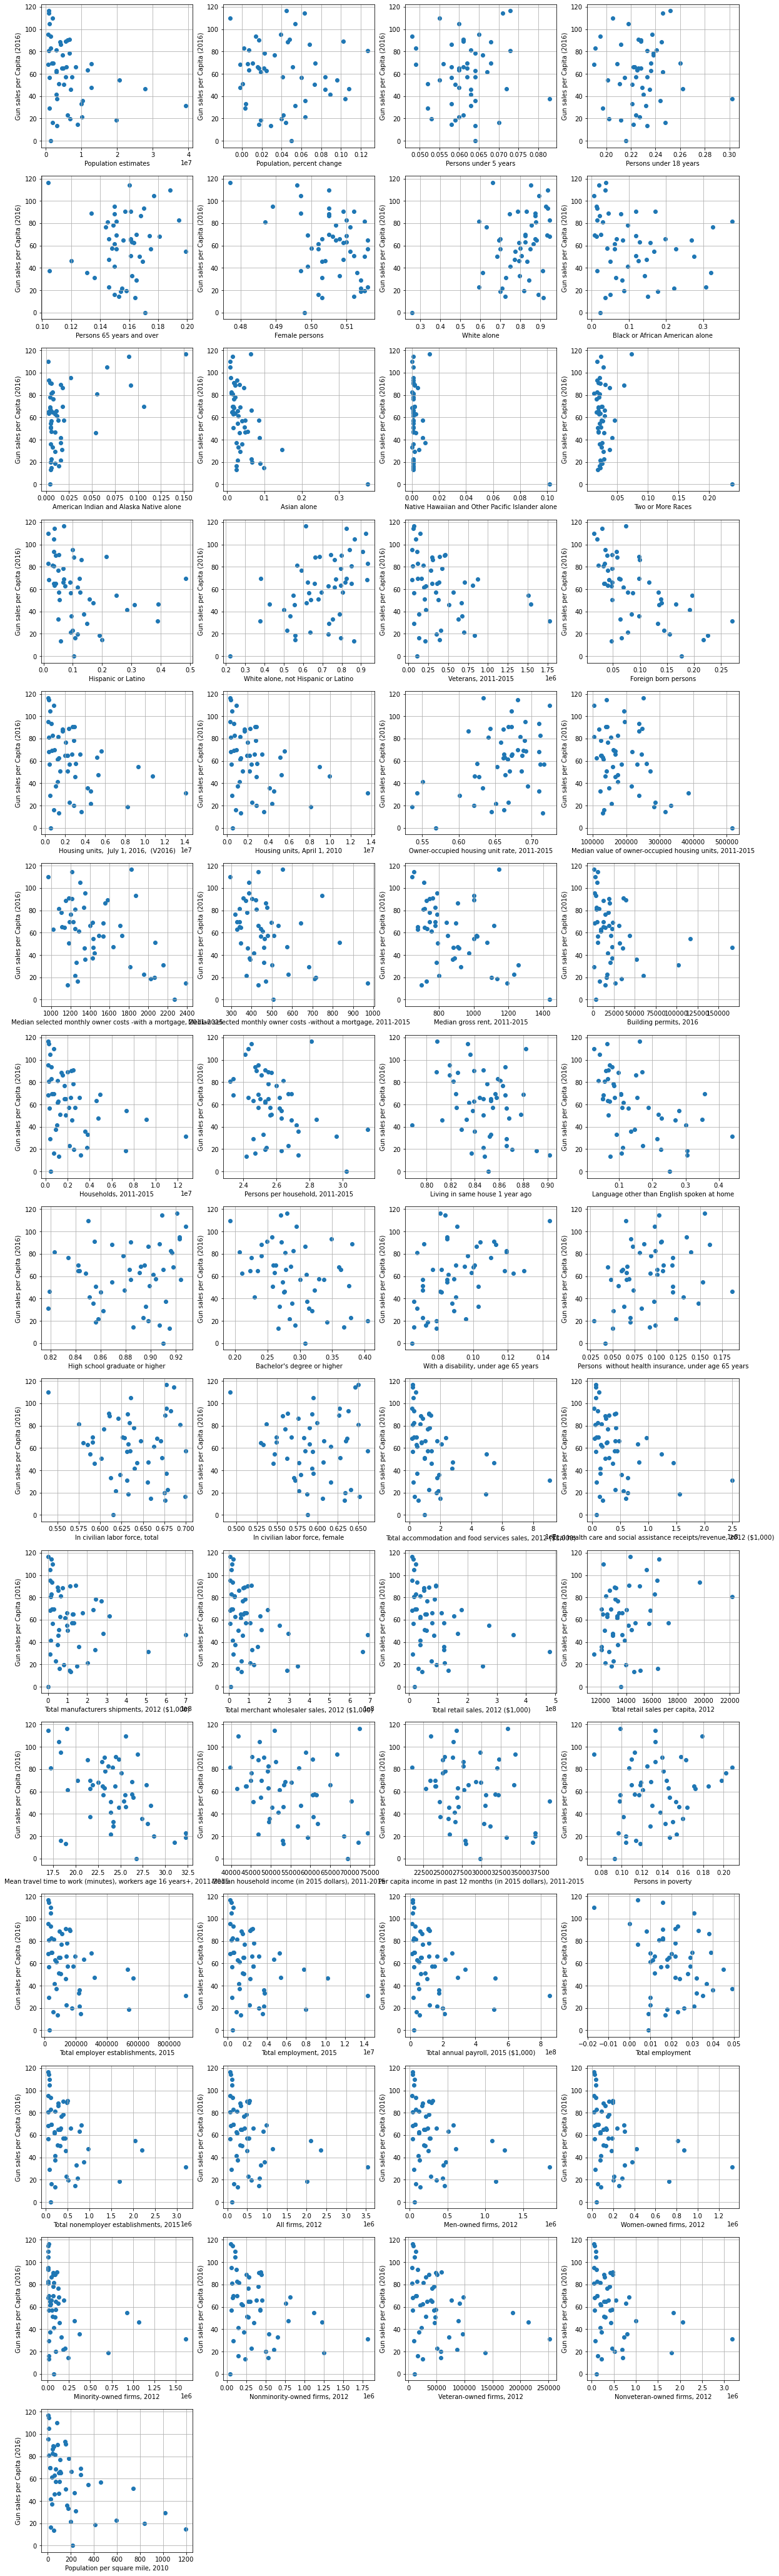

In [159]:
# fig, ax = plt.
plt.figure(figsize=(20,80))
# fig, ax = plt.subplots(16,4, sharey=True)

for i,col in enumerate(final_df2.drop(['estimated gun sales', 'Gun sales per Capita (2016)'], axis=1).columns):
    plt.subplot(16,4, i+1)
    plt.scatter(y=final_df2['Gun sales per Capita (2016)'], x=final_df2[col])
    # plt.title(col)
    plt.ylabel('Gun sales per Capita (2016)')
    plt.xlabel(col)
    plt.grid()
    # ax.set_ylabel(col)


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 - What census data is most associated with high gun per capita?

The arrive at an answer we'll take two approaches.

The first involves taking the mean gun sales per capita data and seperating the dataset into those above and below this value.
We then compare the mean of each census data column between high and low gun sales per capita and use that to draw a conclusion.

In [105]:
# average gun sales per capita
agspc = final_df['Gun sales per Capita (2016)'].mean()
agspc

60.18355573199736

unneeded columns to drop

In [104]:
drop_columns = ['Population estimates','estimated gun sales','Gun sales per Capita (2016)', 'Population, percent change']

Get a dataframe of states with higher than average gun sales per capita via query method

In [106]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
high_df = final_df.query('`Gun sales per Capita (2016)` > {}'.format(agspc)).drop(drop_columns, axis=1)

high_df.describe()

,Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Two or More Races,Hispanic or Latino,"White alone, not Hispanic or Latino",Foreign born persons
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.061593,0.227185,0.158222,0.503778,0.829296,0.093741,0.027370,0.023074,0.001667,0.025000,0.081074,0.759519,0.052185
std,0.006553,0.017919,0.017632,0.008798,0.099528,0.099777,0.039424,0.014754,0.002418,0.013356,0.091873,0.129183,0.025945
min,0.048000,0.190000,0.104000,0.477000,0.593000,0.006000,0.002000,0.008000,0.000000,0.012000,0.015000,0.381000,0.015000
25%,0.059000,0.220000,0.150000,0.500500,0.790500,0.020500,0.004000,0.015000,0.001000,0.019000,0.036000,0.674000,0.035000
50%,0.061000,0.228000,0.160000,0.505000,0.856000,0.062000,0.008000,0.018000,0.001000,0.021000,0.052000,0.795000,0.047000
75%,0.065500,0.238000,0.166500,0.509500,0.886000,0.123000,0.022500,0.027500,0.001500,0.026000,0.095500,0.845500,0.062000
max,0.073000,0.260000,0.194000,0.516000,0.948000,0.377000,0.152000,0.066000,0.013000,0.073000,0.485000,0.935000,0.117000


States with lower than average gun sales.

In [107]:
low_df = final_df.query('`Gun sales per Capita (2016)` < {}'.format(agspc)).drop(drop_columns, axis=1)
low_df.describe()

,Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Two or More Races,Hispanic or Latino,"White alone, not Hispanic or Latino",Foreign born persons
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.061609,0.227870,0.153739,0.507826,0.750565,0.129609,0.011304,0.067304,0.006652,0.034652,0.159478,0.615348,0.133565
std,0.006827,0.022155,0.019205,0.006499,0.136701,0.090395,0.010486,0.074354,0.020962,0.044706,0.101503,0.152277,0.060912
min,0.052000,0.197000,0.105000,0.497000,0.258000,0.014000,0.004000,0.016000,0.000000,0.018000,0.050000,0.221000,0.047000
25%,0.058000,0.215500,0.147000,0.502500,0.705500,0.056000,0.005000,0.030000,0.001000,0.021000,0.093000,0.541500,0.080500
50%,0.061000,0.224000,0.154000,0.509000,0.776000,0.118000,0.007000,0.047000,0.001000,0.024000,0.124000,0.629000,0.135000
75%,0.064000,0.233000,0.164500,0.514000,0.825500,0.172500,0.015000,0.076500,0.002500,0.027500,0.195000,0.731500,0.171500
max,0.083000,0.302000,0.199000,0.516000,0.914000,0.320000,0.054000,0.377000,0.102000,0.237000,0.391000,0.862000,0.270000


Obtain the mean of each statistic

In [108]:
high_means_df = high_df.mean()

high_means_df

Persons under 5 years                               0.061593
Persons under 18 years                              0.227185
Persons 65 years and over                           0.158222
Female persons                                      0.503778
White alone                                         0.829296
Black or African American alone                     0.093741
American Indian and Alaska Native alone             0.027370
Asian alone                                         0.023074
Native Hawaiian and Other Pacific Islander alone    0.001667
Two or More Races                                   0.025000
Hispanic or Latino                                  0.081074
White alone, not Hispanic or Latino                 0.759519
Foreign born persons                                0.052185
dtype: float64

In [109]:
string = "White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)"
loc = string.find(', percent')
string[:loc]

'White alone, not Hispanic or Latino'

In [110]:
low_means_df = low_df.mean()

low_means_df

Persons under 5 years                               0.061609
Persons under 18 years                              0.227870
Persons 65 years and over                           0.153739
Female persons                                      0.507826
White alone                                         0.750565
Black or African American alone                     0.129609
American Indian and Alaska Native alone             0.011304
Asian alone                                         0.067304
Native Hawaiian and Other Pacific Islander alone    0.006652
Two or More Races                                   0.034652
Hispanic or Latino                                  0.159478
White alone, not Hispanic or Latino                 0.615348
Foreign born persons                                0.133565
dtype: float64

Do a comparison between the mean of each statistic for states with high and low gun sales per capita.

In [111]:
diff_df = pd.DataFrame({'low': low_means_df, 'high': high_means_df}, index=low_means_df.index)

diff_df['Variance %'] = (diff_df.high - diff_df.low)/diff_df.high * 100

diff_df.sort_values(['Variance %'], ascending=False)

,low,high,Variance %
American Indian and Alaska Native alone,0.011304,0.027370,58.698594
"White alone, not Hispanic or Latino",0.615348,0.759519,18.981853
White alone,0.750565,0.829296,9.493721
Persons 65 years and over,0.153739,0.158222,2.833415
Persons under 5 years,0.061609,0.061593,-0.026144
Persons under 18 years,0.227870,0.227185,-0.301243
Female persons,0.507826,0.503778,-0.803590
Black or African American alone,0.129609,0.093741,-38.262931
Two or More Races,0.034652,0.025000,-38.608696
Hispanic or Latino,0.159478,0.081074,-96.706854


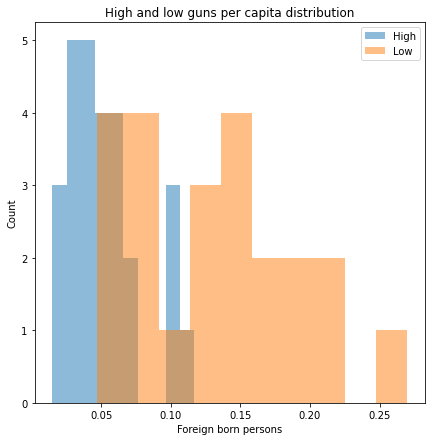

In [120]:
fig, ax = plt.subplots(figsize=(7,7))

comparison = 'Foreign born persons'

ax.hist(high_df[comparison], alpha=0.5, label='High')
ax.hist(low_df[comparison], alpha=0.5, label='Low')
ax.set_title("High and low guns per capita distribution")
ax.set_xlabel(comparison)
ax.set_ylabel('Count')
ax.legend(loc='best');

This leads to some interesting conclusions which will be further discussed in the conclusions section.

But a quick glance indicates that the percentage of "American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)" and "White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)" are generally higher in states with higher than average "Guns per Capita"

Lets also take a look at a correlation heatmap to see what we can infer

<AxesSubplot:>

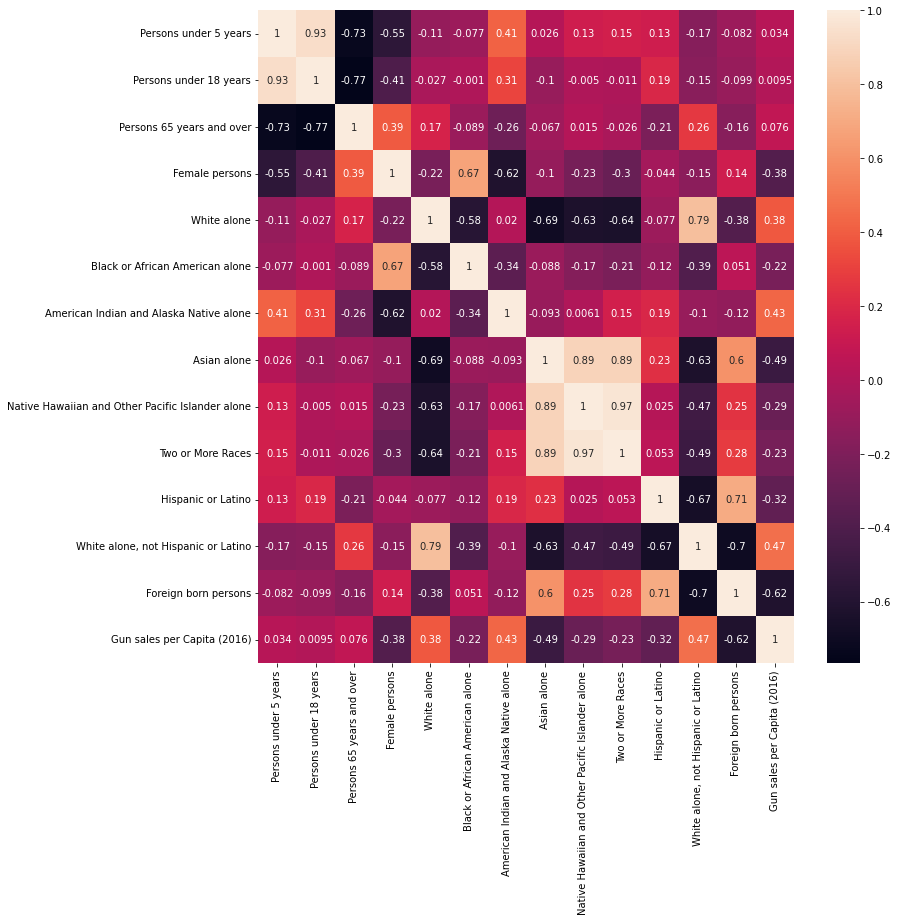

In [119]:
plt.figure(figsize=(12,12))

sns.heatmap(final_df.drop(['Population estimates','estimated gun sales', 'Population, percent change'], axis=1).corr(), annot=True)

The correlation map shows that "American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)" and "White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)" have the strongest correlation with "Guns per Capita"

On the other hand most other demographics exihibit a negative correlation with "Guns per Capita", the highest being "Foreign born persons, percent, 2011-2015"

### Research Question 2 - What is the overall trend of gun sales

We are going to approach this question from two angles.

- Month on month trends of gun sales

- Year on year trend

#### Month on month trends of gun sales

In [ ]:
months_dict = {"January":5, "February":6, "March":7,"April":8,"May":9,"June":10,"July":11,"August":0,"September":1,"October":2,"November":3,"December":4}

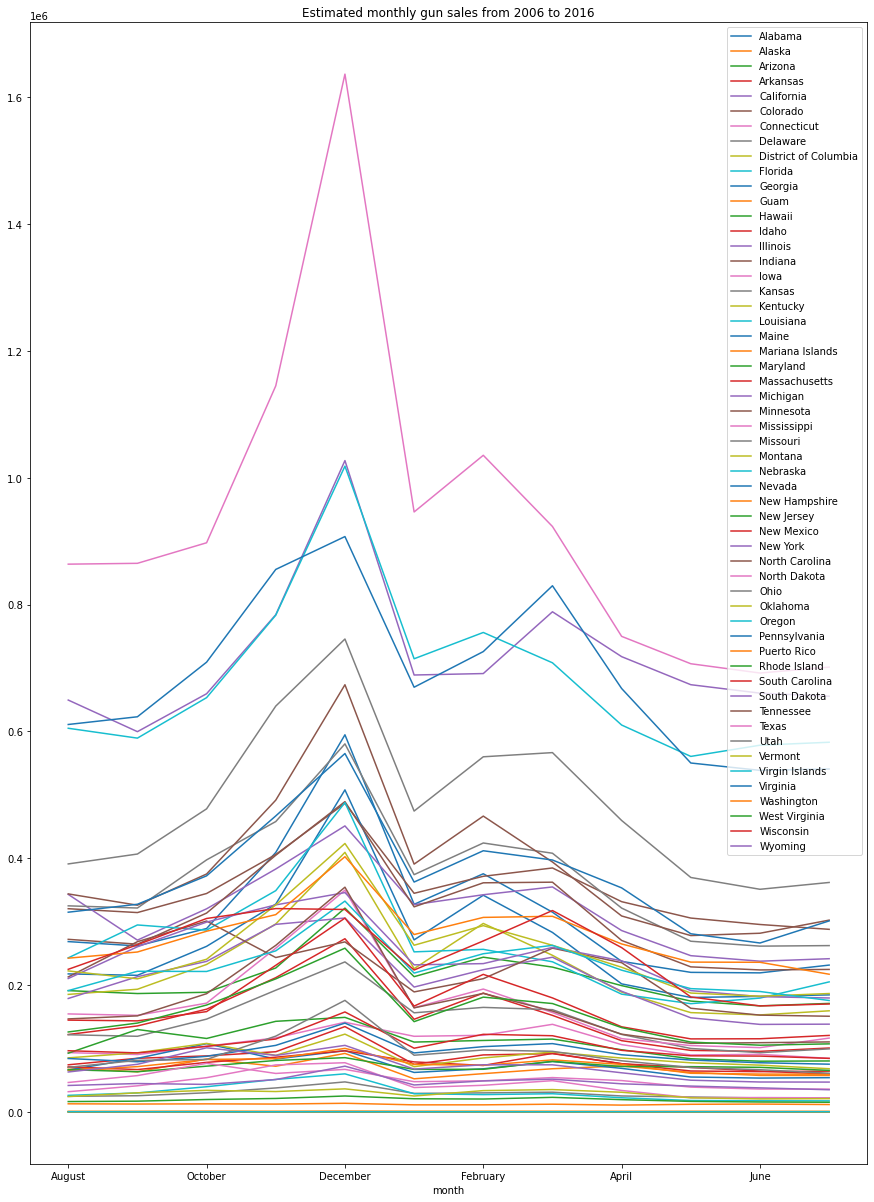

In [ ]:
tt = nics_data_year.query('year >= 2006 and year <= 2016').groupby(['state', 'month']).sum()
fig, ax = plt.subplots(figsize=(15,21))
dx = tt.groupby(level=0)
for label, df in tt.groupby(level=0):
    df.droplevel(0).sort_values(by=['month'], key=lambda x: x.map(months_dict))['estimated gun sales'].plot( ax=ax, label=label,legend=True, title="Estimated monthly gun sales from 2006 to 2016")
# plt.xticks(months)
# plt.ylim((-2500,250000))
plt.show()

A look at the graph shows a sharp spike in gun sales in December for each month.
This is followed by a brief sharp decline, then a gradual decline followed by an uptick peaking in december.

#### Year on Year trend

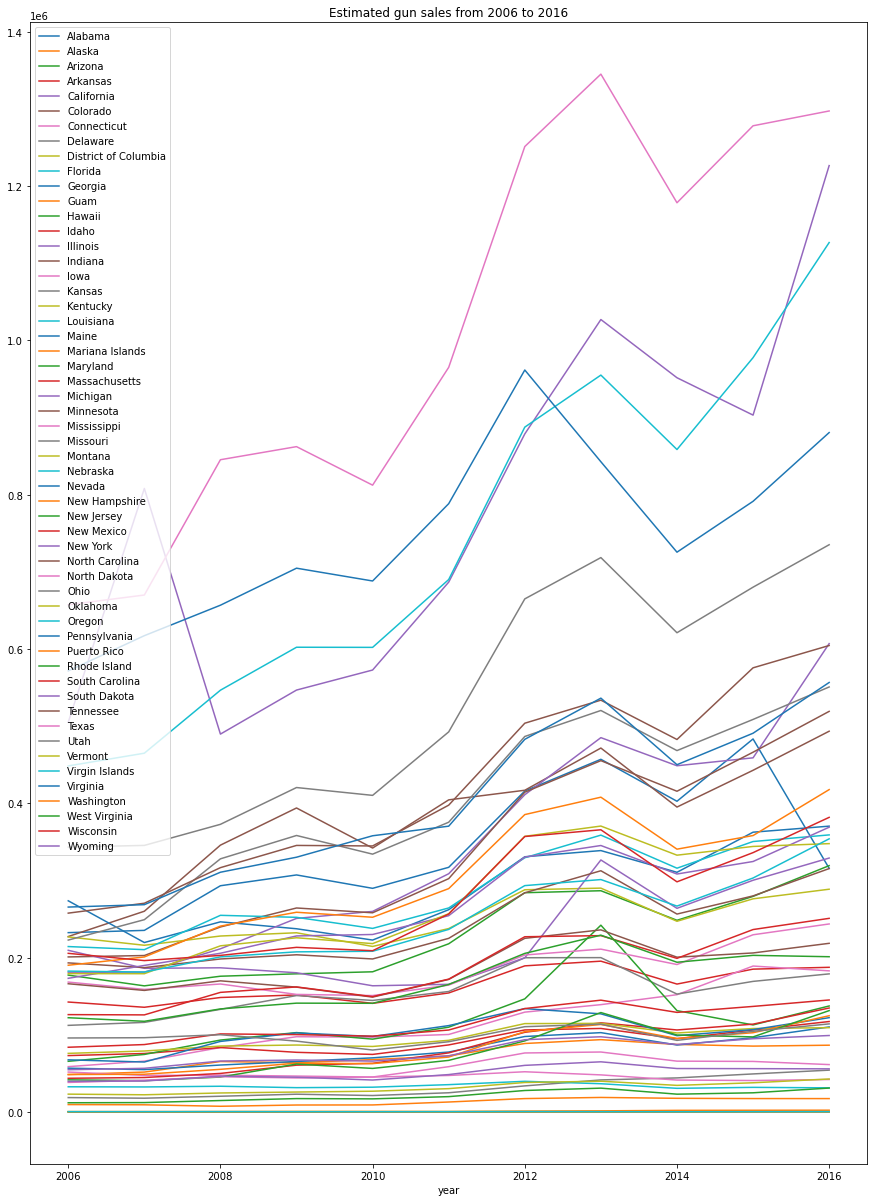

In [ ]:
tt2 = nics_data_year.query('year >= 2006 and year <= 2016').groupby(['state', 'year']).sum()
fig, ax = plt.subplots(figsize=(15,21))
for label, df in tt2.groupby(level=0):
    df.droplevel(0)['estimated gun sales'].plot( ax=ax, label=label, legend=True, title="Estimated gun sales from 2006 to 2016")
plt.show()

There has a general increase in gun sales over the years

<a id='conclusions'></a>
## Conclusions


This was certainly an interesting project and insights gained throught analysing the data where a bit unexpected for me.

The first question that we sought to answer was which of our census data was most associated with high gun per capita.

Both methodologies indicated that a higher 'White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)' and 'American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)' percentage is usually associated with a high gun per capita.

Suprisingly both methodologies also indicated that mixed communities as well as communities with a high number of veterans tended to be associated with lower guns per capita.

The second question was to get a general idea of the trend of gun sales.

The analysis of the data trend indicated that gun sales are seasonal peaking at the holiday season and lulling in the summer season.

There are seems to be a general year on year increase in guns sales.


## Limitations

The main limitations on this data set was the lack of direct gun sales data.

The NICS database is a database of background and permits check, this was instead estimated using the NICS data using the methodology stated in the data wrangling section.

There was also a need to pick a selection of the census data to work with as there are over fifty data points in the base data.
The selected part was those with information on population percentage of Age, race and gender groups.